In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
size_X = 16#feature map图像大小4*4
size_Y = 16
rpn_stride = 8#下采样比例

scales = [1,2,8]#3个面积尺寸*3个长宽比
rations = [0.5,1,2]#1:2&1:1&2:1

In [3]:
f_x = np.arange(size_X) * 8#投影到x轴可能取到的坐标数
f_y = np.arange(size_Y) * 8#投影到原始图像，真正的锚点坐标
#可以替代双重for循环
F_x, F_y = np.meshgrid(f_x,f_y)#输入坐标向量返回坐标矩阵

In [4]:
F_x,F_y#x和y一一组合16个点,x数组纵向copy,y横向copy

(array([[  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
         104, 112, 120],
        [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
         104, 112, 120],
        [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
         104, 112, 120],
        [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
         104, 112, 120],
        [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
         104, 112, 120],
        [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
         104, 112, 120],
        [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
         104, 112, 120],
        [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
         104, 112, 120],
        [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
         104, 112, 120],
        [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
         104, 112, 120],
        [ 

In [5]:
def anchor_gen(size_X,size_Y,rpn_stride,scales,rations):
    #meshgrid_1，3*3
    scales,rations = np.meshgrid(scales,rations)
    scales,rations = scales.flatten(),rations.flatten()
    scalesY = scales * np.sqrt(rations)#锚框的长宽
    scalesX = scales / np.sqrt(rations)#/不太懂
    
    shiftX = np.arange(0,size_X) * rpn_stride#映射到原图则为锚点坐标
    shiftY = np.arange(0,size_Y) * rpn_stride
     #meshgrid_2，4*4
    shiftX,shiftY = np.meshgrid(shiftX,shiftY)
    
    #有了锚点坐标再和锚框尺寸组合，4*4个锚点9个锚框
     #meshgrid_3，16*9
    centerX,anchorX = np.meshgrid(shiftX,scalesX)
    centerY,anchorY = np.meshgrid(shiftY,scalesY)
    #组合成真正的坐标，-1第一维任意，第二维表示两个坐标属性
    anchor_center = np.stack([centerY,centerX],axis=2).reshape(-1,2)
    anchor_size = np.stack([anchorY,anchorX],axis=2).reshape(-1,2)
    #左上顶点坐标=中心坐标-0.5*size
    boxes = np.concatenate([anchor_center-0.5*anchor_size,anchor_center+0.5*anchor_size],axis=1)
    return boxes

In [6]:
anchors = anchor_gen(size_X,size_Y,rpn_stride,scales,rations)
anchors.shape#256*9，16*16是格点的数量

(2304, 4)

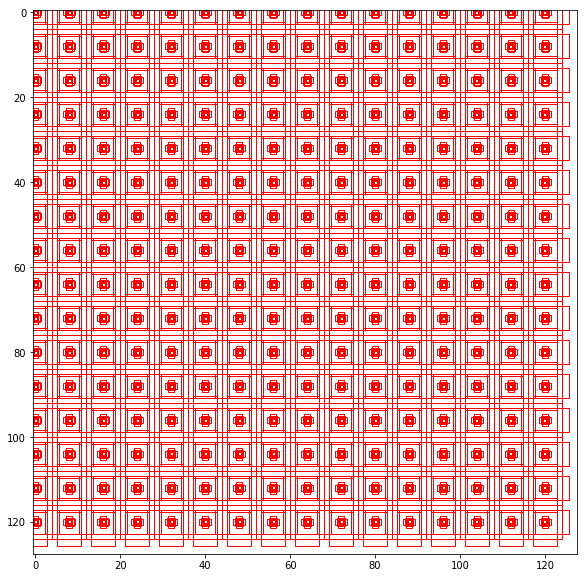

In [7]:
plt.figure(figsize=[10,10])
img = np.ones((128,128,3))#定义一张白图
plt.imshow(img)
Axs = plt.gca()#get current Axs
for i in range(anchors.shape[0]):
    box = anchors[i]
    rec = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],edgecolor="r",facecolor='none')
    Axs.add_patch(rec)

In [9]:
anchor_center.shape
anchor_size.shape

NameError: name 'anchor_center' is not defined

In [33]:
centerX.shape#共有9*16个锚框，例如共有4*4个坐标点

(9, 16)

In [17]:
scales,rations = np.meshgrid(scales,rations)
scales,rations = scales.flatten(),rations.flatten()
scalesY = scales * np.sqrt(rations)#锚框的长宽
scalesX = scales * np.sqrt(rations)

shiftX = np.arange(size_X) * 8#映射到原图则为锚点坐标
shiftY = np.arange(size_Y) / 8
shiftX,shiftY = np.meshgrid(shiftX,shiftY)#
#有了锚点坐标再和锚框尺寸组合，4*4个锚点9个锚框
centerX,anchorX = np.meshgrid(shiftX,scalesX)
centerY,anchorY = np.meshgrid(shiftY,scalesY)

#组合成真正的坐标，-1第一维任意，第二维表示两个坐标属性
anchor_center = np.stack([centerX,centerY],axis=2).reshape(-1,2)
anchor_size = np.stack([anchorX,anchorY],axis=2).reshape(-1,2)
#左上顶点坐标=中心坐标-0.5*size,右下顶点坐标
boxes = np.concatenate([anchor_center-0.5*anchor_size,anchor_center+0.5*anchor_size].axis=1)
boxes

SyntaxError: keyword can't be an expression (<ipython-input-17-ded45f6315ed>, line 17)

In [34]:
centerX#锚点坐标有9个重复，但和9个尺寸组合即一一对应

array([[ 0,  0,  0,  0,  8,  8,  8,  8, 16, 16, 16, 16, 24, 24, 24, 24],
       [ 0,  0,  0,  0,  8,  8,  8,  8, 16, 16, 16, 16, 24, 24, 24, 24],
       [ 0,  0,  0,  0,  8,  8,  8,  8, 16, 16, 16, 16, 24, 24, 24, 24],
       [ 0,  0,  0,  0,  8,  8,  8,  8, 16, 16, 16, 16, 24, 24, 24, 24],
       [ 0,  0,  0,  0,  8,  8,  8,  8, 16, 16, 16, 16, 24, 24, 24, 24],
       [ 0,  0,  0,  0,  8,  8,  8,  8, 16, 16, 16, 16, 24, 24, 24, 24],
       [ 0,  0,  0,  0,  8,  8,  8,  8, 16, 16, 16, 16, 24, 24, 24, 24],
       [ 0,  0,  0,  0,  8,  8,  8,  8, 16, 16, 16, 16, 24, 24, 24, 24],
       [ 0,  0,  0,  0,  8,  8,  8,  8, 16, 16, 16, 16, 24, 24, 24, 24]])

In [23]:
scales,rations = np.meshgrid(scales,rations)
scales,rations = scales.flatten(),rations.flatten()
scales,rations

(array([2, 4, 8, 2, 4, 8, 2, 4, 8]),
 array([0.5, 0.5, 0.5, 1. , 1. , 1. , 2. , 2. , 2. ]))

In [1]:
anchors = anchor_gen(size_X,size_Y,rpn_stride,scales,rations)
anchors.shape

NameError: name 'anchor_gen' is not defined